In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [4]:
from tensorflow.keras.datasets import mnist

2026-01-16 04:33:57.598175: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-16 04:33:57.652492: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-16 04:34:00.123089: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [5]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [6]:
x_train.dtype

dtype('uint8')

In [7]:
x_test.dtype

dtype('uint8')

In [8]:
x_train,x_test = x_train / 255.0, x_test/255.0

In [9]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.models import Sequential
set_random_seed(46)

model = Sequential([
    # 28×28 piksellik giriş görüntüsünü, 784 elemanlı tek boyutlu bir vektöre çeviren katman
    Flatten(input_shape = (28,28)),
    #64 nöronlu ve ReLU aktivasyon fonksiyonuna sahip, tam bağlı (Dense) gizli katman
    Dense(64,activation = "relu"),
    #0’dan 9’a kadar her rakam için bir tane olacak şekilde, 10 nöronlu çıkış katmanı
    Dense(10,activation='softmax')
])

/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2026-01-16 04:34:02.007957: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics=['accuracy'])
model

<Sequential name=sequential, built=True>

In [11]:
model.fit(x_train,y_train,epochs=15,batch_size=10)

Epoch 1/15


2026-01-16 04:34:16.690853: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9274 - loss: 0.2495
Epoch 2/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9646 - loss: 0.1188
Epoch 3/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9747 - loss: 0.0862
Epoch 4/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9802 - loss: 0.0676
Epoch 5/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9841 - loss: 0.0544
Epoch 6/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9873 - loss: 0.0443
Epoch 7/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9887 - loss: 0.0377
Epoch 8/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9901 - loss: 0.0320
Epoch 9/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9913 - loss: 0.0277
Epoch 10/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9923 - loss: 0.0240
Epoch 11/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9930 - loss: 0.0215
Epoch 12/15
6000/6000 ━━━━━━━━━━━━━━━━

In [12]:
_,accuracy = model.evaluate(x_train,y_train)
print(f'Accuracy : {accuracy}')

  41/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9932 - loss: 0.0232    

2026-01-16 04:40:13.732278: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9909 - loss: 0.0281
Accuracy : 0.9909166693687439


In [16]:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)
print('\nTest accuracy :',test_acc)

2026-01-16 04:59:35.318288: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 1s - 2ms/step - accuracy: 0.9693 - loss: 0.1694

Test accuracy : 0.9692999720573425


In [21]:
import numpy as np

y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
import matplotlib.pyplot as plt

  1/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


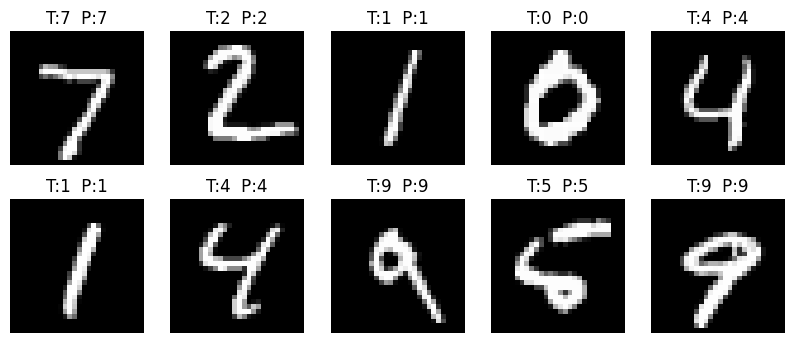

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Tahmin al
y_pred = model.predict(x_test)

# 2) Sınıfa çevir
y_pred_classes = np.argmax(y_pred, axis=1)
# argmax = en büyük değerin index’ini döndürür
# 3) Göster
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"T:{y_test[i]}  P:{y_pred_classes[i]}")
    plt.axis("off")

